In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## Perform basic EDA

In [38]:
# Load the dataset
df = pd.read_csv("C:\\Users\\user\\Downloads\\house_price.csv")

# Q1: Perform Basic EDA
print("Shape of the dataset:")
print(df.shape)
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())



Shape of the dataset:
(13200, 7)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB

Summary Statistics:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.00

## Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median

In [40]:
# Q2: Detect and Remove Outliers
price_per_sqft = df['price_per_sqft']
mean_val = np.mean(price_per_sqft)
std_dev = np.std(price_per_sqft)
q1, q3 = np.percentile(price_per_sqft, [25, 75])
iqr = q3 - q1
print(mean_val)
print(std_dev)
print(iqr)


7920.336742424242
106723.11755607238
3050.0


In [41]:
# Outlier Removal Methods
upper_limit = mean_val + 3 * std_dev
lower_limit = mean_val - 3 * std_dev
df_trimmed_std = df[(df['price_per_sqft'] >= lower_limit) & (df['price_per_sqft'] <= upper_limit)]

lower_percentile, upper_percentile = np.percentile(price_per_sqft, [1, 99])
df_trimmed_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
df_trimmed_iqr = df[(df['price_per_sqft'] >= iqr_lower) & (df['price_per_sqft'] <= iqr_upper)]

z_scores = np.abs(stats.zscore(df['price_per_sqft']))
df_trimmed_zscore = df[z_scores < 3]
print(z_scores)



0        0.039554
1        0.030971
2        0.033876
3        0.015698
4        0.034391
           ...   
13195    0.011538
13196    0.029897
13197    0.024946
13198    0.023300
13199    0.045260
Name: price_per_sqft, Length: 13200, dtype: float64


## Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data? 

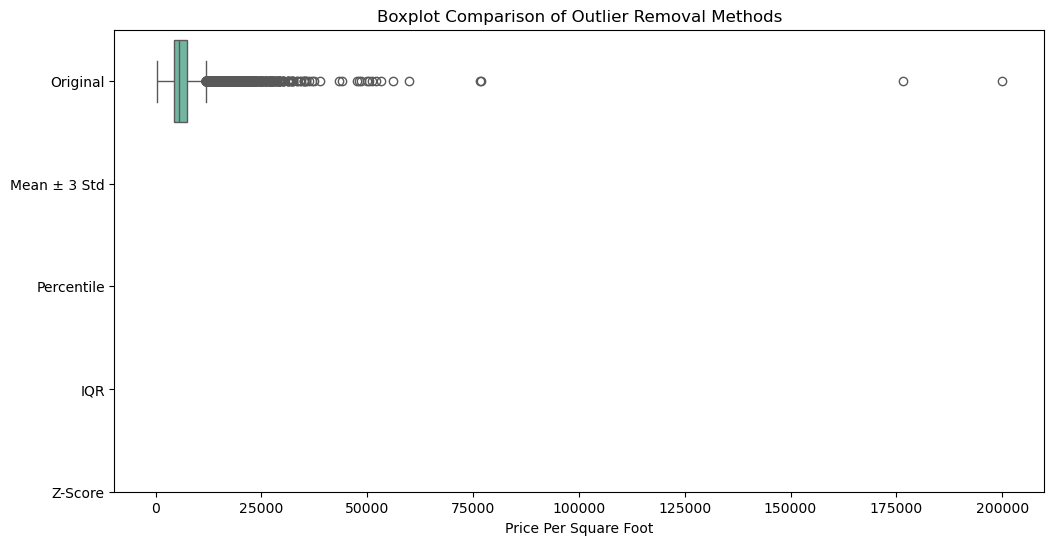

In [43]:
# Box Plot for Outlier Removal Comparison
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df['price_per_sqft'], df_trimmed_std['price_per_sqft'], df_trimmed_percentile['price_per_sqft'], 
                  df_trimmed_iqr['price_per_sqft'], df_trimmed_zscore['price_per_sqft']], orient="h", palette="Set2")
plt.yticks([0, 1, 2, 3, 4], ["Original", "Mean ± 3 Std", "Percentile", "IQR", "Z-Score"])
plt.xlabel("Price Per Square Foot")
plt.title("Boxplot Comparison of Outlier Removal Methods")
plt.show()



In [44]:
## Q4 Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.

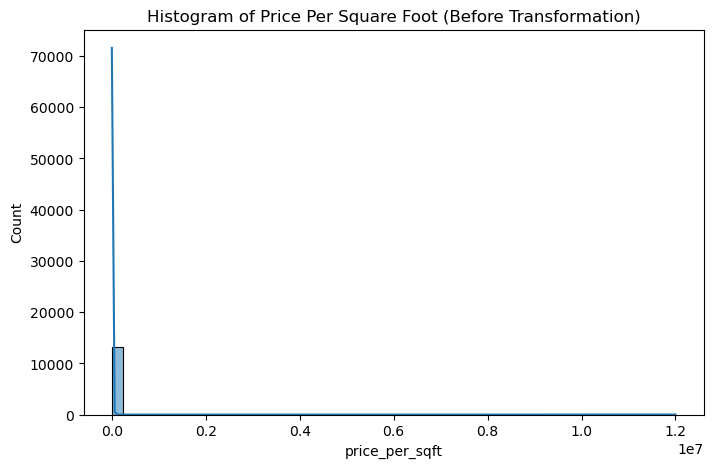

Skewness: 108.28105529705168
Kurtosis: 12095.21502832288


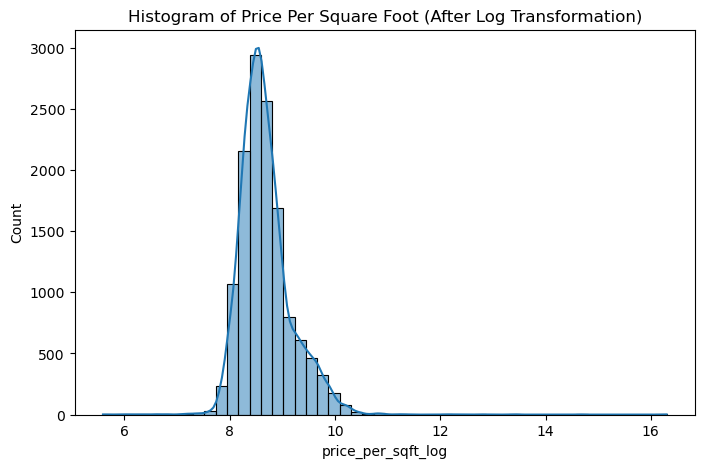

Skewness (After): 1.4004850530059296
Kurtosis (After): 9.206942162860814


In [45]:
# Q4: Histogram & Normality Check
plt.figure(figsize=(8, 5))
sns.histplot(df['price_per_sqft'], kde=True, bins=50)
plt.title("Histogram of Price Per Square Foot (Before Transformation)")
plt.show()

# Check Skewness and Kurtosis
print("Skewness:", df['price_per_sqft'].skew())
print("Kurtosis:", df['price_per_sqft'].kurt())

# Log Transformation
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])

# Histogram After Transformation
plt.figure(figsize=(8, 5))
sns.histplot(df['price_per_sqft_log'], kde=True, bins=50)
plt.title("Histogram of Price Per Square Foot (After Log Transformation)")
plt.show()

# Skewness & Kurtosis After Transformation
print("Skewness (After):", df['price_per_sqft_log'].skew())
print("Kurtosis (After):", df['price_per_sqft_log'].kurt())





## Q5. Check the correlation between all the numerical columns and plot heatmap.

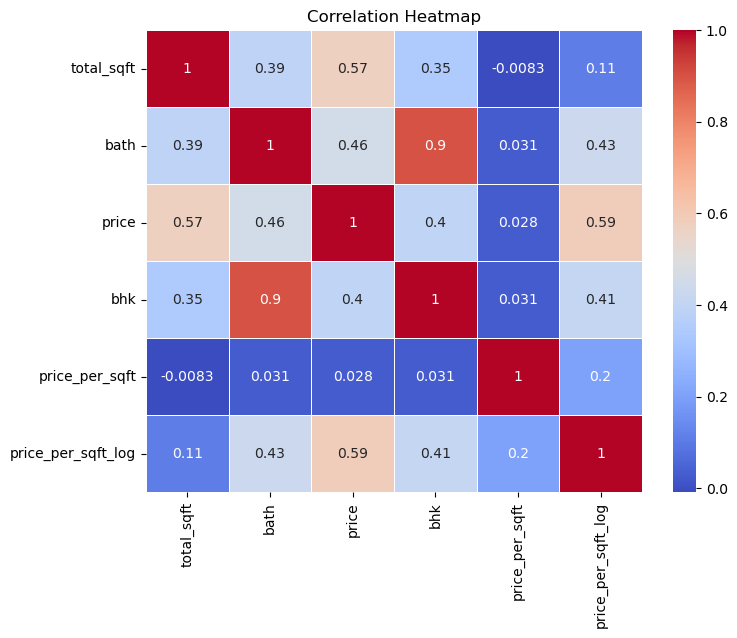

In [47]:
# Q5: Correlation & Heatmap
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Draw Scatter plot between the variables to check the correlation between them. 

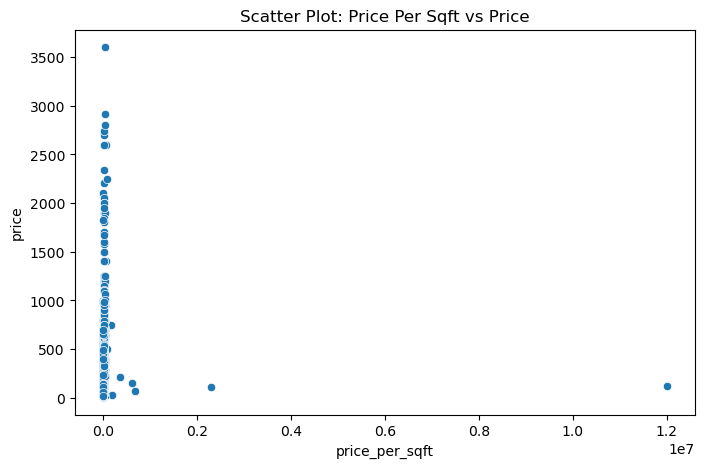

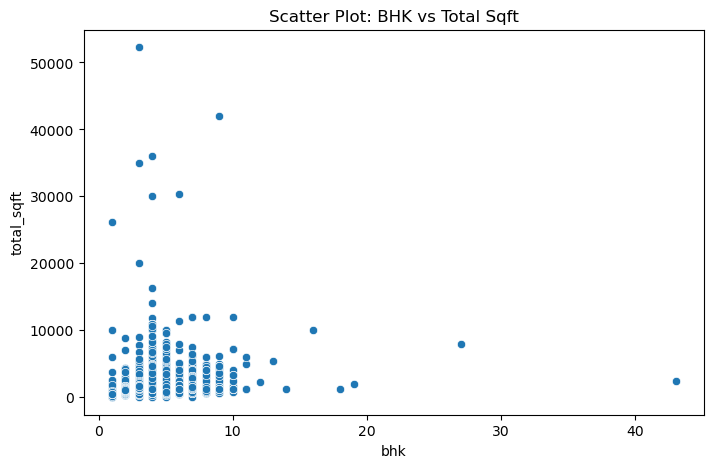

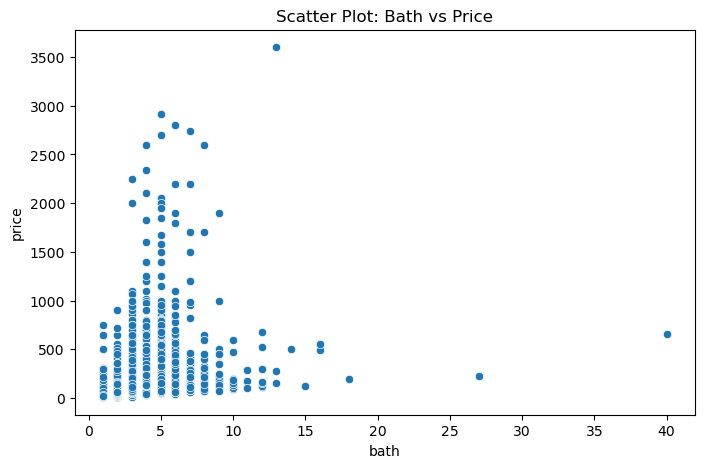

In [49]:
# Q6: Scatter Plots
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['price_per_sqft'], y=df['price'])
plt.title("Scatter Plot: Price Per Sqft vs Price")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['bhk'], y=df['total_sqft'])
plt.title("Scatter Plot: BHK vs Total Sqft")
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['bath'], y=df['price'])
plt.title("Scatter Plot: Bath vs Price")
plt.show()
